In [2]:
!ls QVI_transaction_data.xlsx

QVI_transaction_data.xlsx


In [3]:
import pandas as pd
import re

# Load the data
transaction_data = pd.read_excel('QVI_transaction_data.xlsx', sheet_name='in')

# Convert Excel serial date to datetime
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='D', origin='1899-12-30')

# Extract pack size as numeric grams from the product name
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d{2,3})g').astype(float)

# Extract brand name as the first word (assuming brand is at the start of the product name)
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

# Display extracted features
print(transaction_data[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head(10))


                                  PROD_NAME  PACK_SIZE    BRAND
0    Natural Chip        Compny SeaSalt175g      175.0  Natural
1                  CCs Nacho Cheese    175g      175.0      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g      170.0   Smiths
3    Smiths Chip Thinly  S/Cream&Onion 175g      175.0   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g      150.0   Kettle
5  Old El Paso Salsa   Dip Tomato Mild 300g      300.0      Old
6  Smiths Crinkle Chips Salt & Vinegar 330g      330.0   Smiths
7     Grain Waves         Sweet Chilli 210g      210.0    Grain
8   Doritos Corn Chip Mexican Jalapeno 150g      150.0  Doritos
9     Grain Waves Sour    Cream&Chives 210G        NaN    Grain


In [5]:
# ## 1️⃣ Environment Setup

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Set visualization styles
sns.set(style="whitegrid")

In [9]:
# ## 2️⃣ Data Import

# Load customer purchase behaviour data
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [10]:
# Load transactional data
transaction_data = pd.read_excel('QVI_transaction_data.xlsx', sheet_name='in')

In [11]:
# ## 3️⃣ Initial Data Checks

# Check first few rows
print(customer_data.head())
print(transaction_data.head())

# Check data types
print(customer_data.dtypes)
print(transaction_data.dtypes)

# Check for missing values
print(customer_data.isnull().sum())
print(transaction_data.isnull().sum())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&On

In [12]:
# ## 4️⃣ Data Cleaning

# Convert Excel serial date to datetime
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='D', origin='1899-12-30')


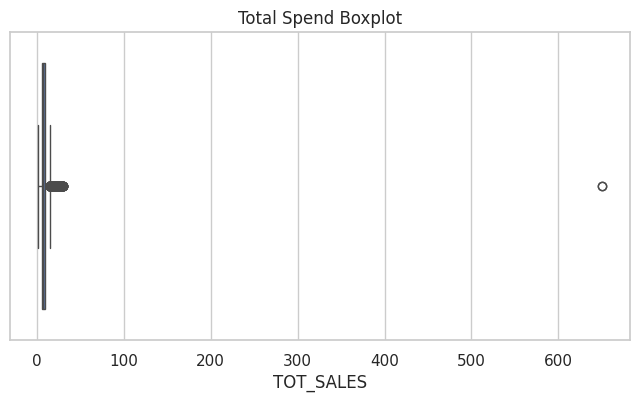

In [13]:
# ## 5️⃣ Outlier Detection & Removal

# Boxplot to detect spend outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=transaction_data['TOT_SALES'])
plt.title('Total Spend Boxplot')
plt.show()

# Remove outliers in TOT_SALES (1.5*IQR rule)
Q1 = transaction_data['TOT_SALES'].quantile(0.25)
Q3 = transaction_data['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = transaction_data[
    (transaction_data['TOT_SALES'] >= (Q1 - 1.5 * IQR)) &
    (transaction_data['TOT_SALES'] <= (Q3 + 1.5 * IQR))
]


In [14]:
 ## 6️⃣ Feature Engineering

# Extract pack size (grams)
filtered_data['PACK_SIZE'] = filtered_data['PROD_NAME'].str.extract(r'(\d{2,3})g').astype(float)

# Extract brand name as the first word in product name
filtered_data['BRAND'] = filtered_data['PROD_NAME'].str.split().str[0]


<ipython-input-14-95d7151c0e83>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['PACK_SIZE'] = filtered_data['PROD_NAME'].str.extract(r'(\d{2,3})g').astype(float)
<ipython-input-14-95d7151c0e83>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['BRAND'] = filtered_data['PROD_NAME'].str.split().str[0]


In [15]:
# ## 7️⃣ Data Merging

# Merge with customer data for segmentation
merged_data = filtered_data.merge(customer_data, on='LYLTY_CARD_NBR', how='left')


                LIFESTAGE  total_spend  avg_spend_per_transaction  total_units
0  MIDAGE SINGLES/COUPLES    183582.95                   7.328368        47455
1            NEW FAMILIES     50253.10                   7.272518        12807
2          OLDER FAMILIES    349945.25                   7.220428        94018
3   OLDER SINGLES/COUPLES    399971.15                   7.358092       103672
4                RETIREES    364567.65                   7.340091        93746
5          YOUNG FAMILIES    314096.85                   7.223274        84077
6   YOUNG SINGLES/COUPLES    259340.00                   7.140222        66388
                  LIFESTAGE     BRAND  total_spend
12   MIDAGE SINGLES/COUPLES    Kettle      37874.0
20   MIDAGE SINGLES/COUPLES    Smiths      19669.6
6    MIDAGE SINGLES/COUPLES   Doritos      18984.9
16   MIDAGE SINGLES/COUPLES  Pringles      16783.2
15   MIDAGE SINGLES/COUPLES       Old       8807.7
..                      ...       ...          ...
183   YOUNG

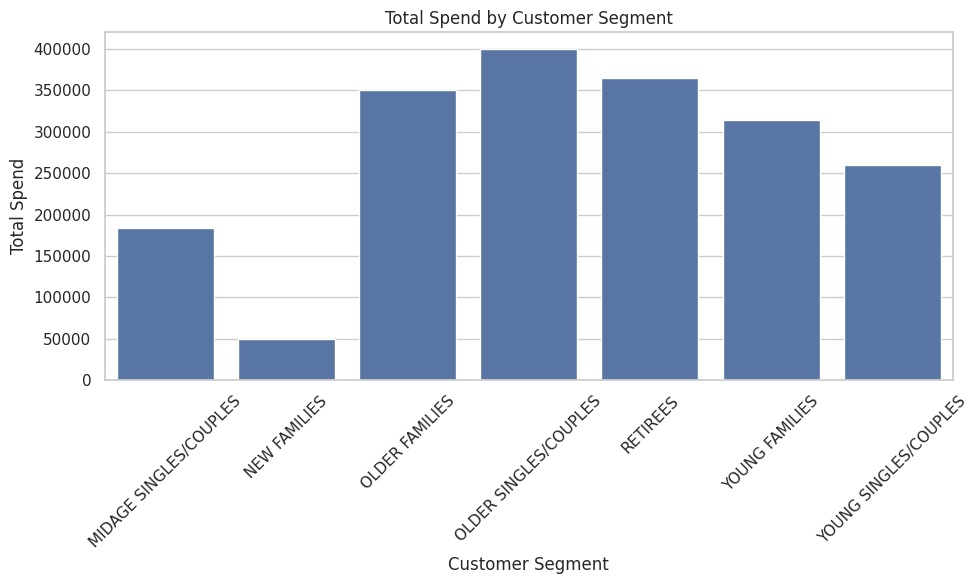

In [16]:
# ## 8️⃣ Summarizing & Initial Insights

# Spend by segment
segment_summary = merged_data.groupby('LIFESTAGE').agg(
    total_spend=('TOT_SALES', 'sum'),
    avg_spend_per_transaction=('TOT_SALES', 'mean'),
    total_units=('PROD_QTY', 'sum')
).reset_index()

print(segment_summary)

# Brand preference by segment
brand_pref = merged_data.groupby(['LIFESTAGE', 'BRAND']).agg(
    total_spend=('TOT_SALES', 'sum')
).reset_index().sort_values(['LIFESTAGE', 'total_spend'], ascending=[True, False])

print(brand_pref)

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='total_spend', data=segment_summary)
plt.title('Total Spend by Customer Segment')
plt.ylabel('Total Spend')
plt.xlabel('Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                 LIFESTAGE PREMIUM_CUSTOMER  total_spend  \
0   MIDAGE SINGLES/COUPLES           Budget     35309.20   
1   MIDAGE SINGLES/COUPLES       Mainstream     90178.20   
2   MIDAGE SINGLES/COUPLES          Premium     58095.55   
3             NEW FAMILIES           Budget     21862.25   
4             NEW FAMILIES       Mainstream     16940.35   
5             NEW FAMILIES          Premium     11450.50   
6           OLDER FAMILIES           Budget    167213.95   
7           OLDER FAMILIES       Mainstream    102668.80   
8           OLDER FAMILIES          Premium     80062.50   
9    OLDER SINGLES/COUPLES           Budget    135858.90   
10   OLDER SINGLES/COUPLES       Mainstream    132618.30   
11   OLDER SINGLES/COUPLES          Premium    131493.95   
12                RETIREES           Budget    112415.70   
13                RETIREES       Mainstream    155033.45   
14                RETIREES          Premium     97118.50   
15          YOUNG FAMILIES           Bud

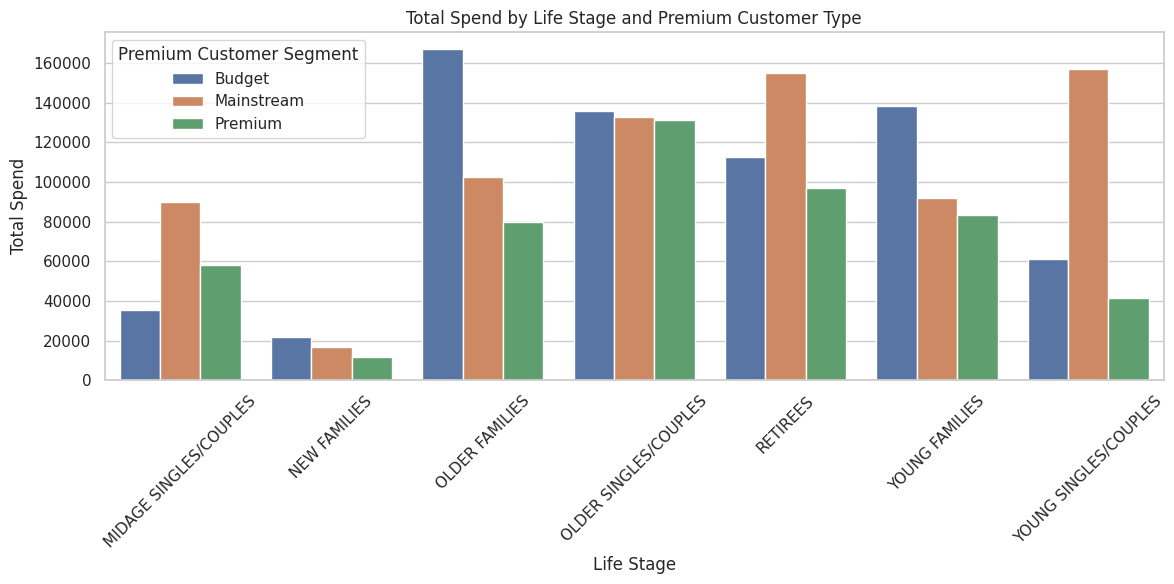

                 LIFESTAGE PREMIUM_CUSTOMER      BRAND  total_spend
12  MIDAGE SINGLES/COUPLES           Budget     Kettle       6676.4
20  MIDAGE SINGLES/COUPLES           Budget     Smiths       3859.4
6   MIDAGE SINGLES/COUPLES           Budget    Doritos       3801.5
16  MIDAGE SINGLES/COUPLES           Budget   Pringles       3141.3
23  MIDAGE SINGLES/COUPLES           Budget      Thins       1656.6
25  MIDAGE SINGLES/COUPLES           Budget   Twisties       1505.4
24  MIDAGE SINGLES/COUPLES           Budget   Tostitos       1403.6
10  MIDAGE SINGLES/COUPLES           Budget  Infuzions       1399.2
15  MIDAGE SINGLES/COUPLES           Budget        Old       1392.3
17  MIDAGE SINGLES/COUPLES           Budget        RRD       1342.2


In [19]:
# Segment-level summarization
segment_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_spend=('TOT_SALES', 'sum'),
    avg_spend_per_transaction=('TOT_SALES', 'mean'),
    total_units=('PROD_QTY', 'sum'),
    avg_units_per_transaction=('PROD_QTY', 'mean'),
    total_transactions=('TXN_ID', 'nunique')
).reset_index()

print(segment_summary)

# Visualize: Total spend by LIFESTAGE & PREMIUM_CUSTOMER
plt.figure(figsize=(12, 6))
sns.barplot(
    x='LIFESTAGE', y='total_spend', hue='PREMIUM_CUSTOMER',
    data=segment_summary
)
plt.title('Total Spend by Life Stage and Premium Customer Type')
plt.ylabel('Total Spend')
plt.xlabel('Life Stage')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer Segment')
plt.tight_layout()
plt.show()

# Additional: Brand preferences by segment
brand_pref = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND']).agg(
    total_spend=('TOT_SALES', 'sum')
).reset_index()

# Show top brands per segment
top_brands_per_segment = brand_pref.sort_values(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'total_spend'],
                                                 ascending=[True, True, False])
print(top_brands_per_segment.head(10))


In [17]:
# ## 9️⃣ Final Thoughts
# - Summarize key findings and draft a recommendation for Julia
# - Suggest possible marketing or promotional strategies based on spend, brand, and pack size preferences